### <span style="background-color: #444; color: white; padding: 5px; padding-left: 10px; padding-right: 10px; margin-top: 00px; margin-bottom: 10px; border-radius: 7px;">INSTRUCTIONS</span>



## Overview


***UPGMA (Unweighted Pair Group Method with Arithmetic Mean)***

UPGMA is a hierarchical clustering algorithm used for constructing phylogenetic trees. It is commonly employed to understand and visualize the evolutionary relationships between biological sequences. The fundamental principle of UPGMA is to estimate the evolutionary time between species based on the pairwise distances of their sequences.

Basic Principles of UPGMA
UPGMA iteratively merges the closest pair of clusters until all species are grouped under a single root. The algorithm involves the following steps:

- Initial State: Each species starts as its own cluster.
- Distance Matrix: A matrix of distances between species is created, typically based on sequence differences.
- Cluster Merging: The two clusters with the smallest distance are found and merged.
- Distance Matrix Update: The distances between the newly formed cluster and the remaining clusters are recalculated and the matrix is updated.
- Iteration: Steps 3 and 4 are repeated until all clusters are merged into a single root.

In [ ]:
##First of all we ensure that which libraries will be use in our UPGMA algorithm.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
#Then we need to provide our testing Cases which is related
if __name__ == "__main__":
    # Provided sequences
    sequences = [
        ("Species1", "AGAGGGTGAT"),
        ("Species2", "CTGCGATTTA"),
        ("Species3", "GACCGTTAAC"), #Test inputs
        ("Species4", "TCAAGTACCT"),
        ("Species5", "TGCACGACAT")
    ]

In [ ]:
# Step 1: Create a Dummy Alignment (Here, we just use the sequences directly)
def dummy_allignment_creation(sequences):
    return sequences  

In [ ]:
    # Create a dummy alignment from the sample sequences
    alignment = dummy_allignment_creation(sequences)  # Create multiple sequence alignment
    print("\nAlignment:")
    for seq in alignment:
        print(f"{seq[0]}: {seq[1]}")  # Print the alignment


Alignment:
Species1: AGAGGGTGAT
Species2: CTGCGATTTA
Species3: GACCGTTAAC
Species4: TCAAGTACCT
Species5: TGCACGACAT


In [ ]:
# Step 2: Calculation for distance matrix based on UPGMA
def computation_for_sequences_matrix(sequences):
    num_sequences = len(sequences)
    distance_matrix = np.zeros((num_sequences, num_sequences))  #First of all we need too initialize our matrix with related 0

    for i in range(num_sequences):
        for j in range(i + 1, num_sequences):
            seq1 = sequences[i][1]      #Then we define based on sequences we add in our matrix with column and both row
            seq2 = sequences[j][1]
            distance = sum(1 for a, b in zip(seq1, seq2) if a != b)  #We now that we need to calculation with differences between related two sequences their DNA molecules
            distance_matrix[i, j] = distance_matrix[j, i] = distance #and update related matrix to distance

    return distance_matrix 

In [ ]:
    # Calculate the distance matrix
    distance_matrix = computation_for_sequences_matrix(alignment)  # Calculate distance matrix
    print("\nDistance Matrix:")
    print(pd.DataFrame(distance_matrix, index=[seq[0] for seq in sequences], columns=[seq[0] for seq in sequences]))  # Print the distance matrix



Distance Matrix:
          Species1  Species2  Species3  Species4  Species5
Species1       0.0       8.0       7.0       7.0       6.0
Species2       8.0       0.0       7.0       9.0      10.0
Species3       7.0       7.0       0.0       8.0       8.0
Species4       7.0       9.0       8.0       0.0       5.0
Species5       6.0      10.0       8.0       5.0       0.0


In [ ]:
# Step 3 We Merged them tehir clusters in here 
def create_phylogenetic_tree(distance_matrix, method='average'):
    # We both checked as we know [Matrix will be like held mirror so we calculate triangle of right side in our upgma]
    upper_triangle_indices = np.triu_indices_from(distance_matrix, 1)
    condensed_matrix = distance_matrix[upper_triangle_indices]
    #When we define that we need to linked between our clusters 
    linkage_matrix = linkage(condensed_matrix, method=method)
    #Then as we known that when we calculate between two cluster our distance will be need to divided to 2 because of we need to calculate for each by each
    linkage_matrix[:, 2] /= 2
    return linkage_matrix

In [ ]:
# Step 4: We preferd to visualize our that clusters related to our calculation
def visualization_matrix_phylogenetic_tree(linkage_matrix, title, sequences):
    fig, ax = plt.subplots(figsize=(10, 6))  #As we given our sequence we have 10 line so it is satisfies
    dendro = dendrogram(linkage_matrix, labels=[seq[0] for seq in sequences], ax=ax, leaf_rotation=90,leaf_font_size=10)  #plotting to our diagram related our calculation above usage linked_matrix
    plt.title(title)  
    plt.show()  #display

    return dendro

In [ ]:
# Step 5: Describe UPGMA Tree Construction
def upgma_creation(distance_matrix, sequences):
    num_sequences = len(sequences)      #We get to details from our number of sequences
    labels = [seq[0] for seq in sequences]       #And we know that each label will be hold in our matrix
    clusters = [[label] for label in labels] # we got our cluster in that each related label
    current_dist_matrix = distance_matrix.copy() #We copy our that our matrix to make for preparation to upgma tree build

    print("\nUPGMA Tree Construction Steps:\n")
    while len(clusters) > 1:

        min_dist = np.inf #As we know that we check that our clusters in that matrix and need to find that minimum value when we find that our min value we need to make cluster between
        for i in range(len(current_dist_matrix)): #row and column related our cluster pair then this code line make that all iteration to till making all sequences
            for j in range(i + 1, len(current_dist_matrix)):
                if current_dist_matrix[i, j] < min_dist:
                    min_dist = current_dist_matrix[i, j]
                    cluster_pair = (i, j)

        i, j = cluster_pair
        print(f"Merge clusters {clusters[i]} and {clusters[j]} with distance {min_dist}\n")

        new_cluster = clusters[i] + clusters[j] #Merged with two clusters
        clusters.append(new_cluster) 
        print(f"New cluster formed: {new_cluster}\n")
        new_distances = []
        for k in range(len(current_dist_matrix)):           #In here we apply that our new distance so we first of all update our matrix after clustering
            if k != i and k != j:
                new_distance = (current_dist_matrix[i, k] + current_dist_matrix[j, k]) / 2
                new_distances.append(new_distance)
        new_dist_matrix = np.zeros((len(current_dist_matrix) - 1, len(current_dist_matrix) - 1))  #We know that when we cluster each pair our matrix will be decrease -1 for row -1 for column
        new_dist_matrix[:-1, :-1] = np.delete(np.delete(current_dist_matrix, (i, j), axis=0), (i, j), axis=1)
        if new_distances:  # As I declare above this is iteration to till 0
            new_dist_matrix[-1, :-1] = new_dist_matrix[:-1, -1] = new_distances

        #We added to proof to our iteration to like this using that pandas library 
        df = pd.DataFrame(new_dist_matrix, index=[str(cl) for cl in clusters[-len(new_dist_matrix):]], columns=[str(cl) for cl in clusters[-len(new_dist_matrix):]])
        print(f"Updated Distance Matrix after merging {new_cluster}:\n")
        print(df.to_string(index=False), "\n")  #we need to clarify to using data frame format
        current_dist_matrix = new_dist_matrix
        clusters.pop(max(i, j))
        clusters.pop(min(i, j))

    print("Final cluster:", clusters[0])


UPGMA Tree Construction Steps:

Merge clusters ['Species4'] and ['Species5'] with distance 5.0

New cluster formed: ['Species4', 'Species5']

Updated Distance Matrix after merging ['Species4', 'Species5']:

 ['Species3']  ['Species4']  ['Species5']  ['Species4', 'Species5']
          0.0           8.0           7.0                       6.5
          8.0           0.0           7.0                       9.5
          7.0           7.0           0.0                       8.0
          6.5           9.5           8.0                       0.0 

Merge clusters ['Species1'] and ['Species4', 'Species5'] with distance 6.5

New cluster formed: ['Species1', 'Species4', 'Species5']

Updated Distance Matrix after merging ['Species1', 'Species4', 'Species5']:

 ['Species3']  ['Species4', 'Species5']  ['Species1', 'Species4', 'Species5']
         0.00                       7.0                                  8.75
         7.00                       0.0                                  7.50
     

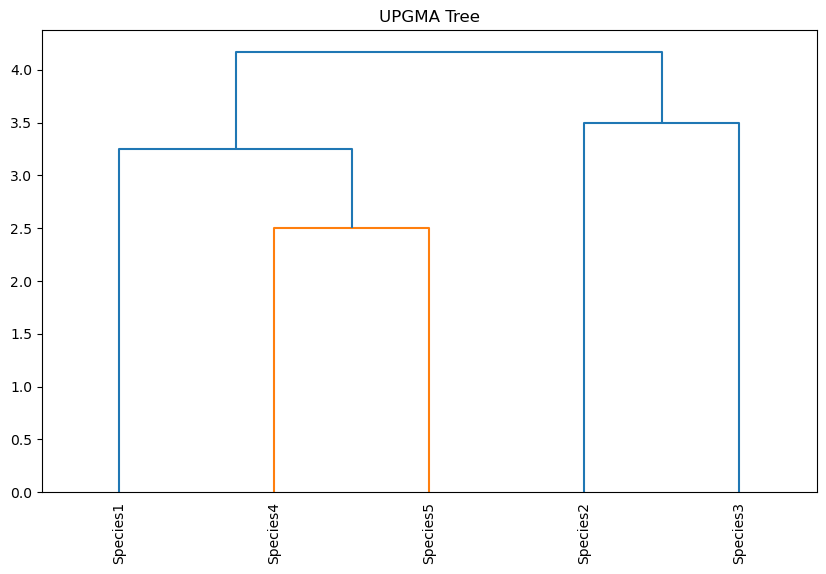

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [12.5, 12.5, 40.0, 40.0]],
 'dcoord': [[0.0, 2.5, 2.5, 0.0],
  [0.0, 3.25, 3.25, 2.5],
  [0.0, 3.5, 3.5, 0.0],
  [3.25, 4.166666666666667, 4.166666666666667, 3.5]],
 'ivl': ['Species1', 'Species4', 'Species5', 'Species2', 'Species3'],
 'leaves': [0, 3, 4, 1, 2],
 'color_list': ['C1', 'C0', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1', 'C0', 'C0']}

In [ ]:
    # Describe UPGMA Tree Construction
    upgma_creation(distance_matrix, sequences)  # Describe the UPGMA tree construction

    # Construct the UPGMA tree
    upgma_tree = create_phylogenetic_tree(distance_matrix, method='average')  # Construct UPGMA tree
    print("\nUPGMA Tree:")
    visualization_matrix_phylogenetic_tree(upgma_tree, "UPGMA Tree", sequences)  # Plot the UPGMA tree

## END OF TO THE UPGMA


# Overview

**Neighbor Joining (NJ)**

Neighbor Joining (NJ) is a method originally developed for inferring unrooted phylogenetic trees. Unlike some other methods, NJ does not assume constant mutation rates across different lineages, making it versatile for various evolutionary scenario.

- Unrooted Trees: NJ was designed to create unrooted trees, but with some modifications, it can produce rooted trees by adding a root at the midpoint of the longest distance connecting two leaves.

- Flexibility in Tree Structure: NJ is capable of generating trees without assuming constant mutation rates, accommodating different evolutionary rates among lineages.

- Cluster Selection: A significant distinction between NJ and UPGMA (Unweighted Pair Group Method with Arithmetic Mean) is how clusters are selected for merging. NJ considers not only the distances between clusters but also aims to select cluster pairs with nodes that are far apart from others.

- Distance Matrix Preprocessing: To facilitate this, the original distance matrix 
$$
Q_{ij} = (n − 2) D_{ij} − \sum_{k=1}^{n} D_{ik} − \sum_{k=1}^{n} D_{jk}
$$

- Cluster Merging: Clusters to be merged are selected based on a trade-off, prioritizing pairs of nodes with the shortest distance among themselves and large distances from other clusters.

- Matrix Recalculation: After each merging step, the distance matrix calculate the matrix again.
$$
D_{ui} = \dfrac{1}{2} \left( D_{ai} + D_{bi} − D_{ab} \right)
$$






In [ ]:
##First of all we ensure that which libraries will be use in our Neighborjoining algorithm.

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
# Example sequences
sequences = {
    "Species1": "AGAGGGTGAT",
    "Species2": "CTGCGATTTA",
    "Species3": "GACCGTTAAC",
    "Species4": "TCAAGTACCT",
    "Species5": "TGCACGACAT"
}


In [ ]:
def calculate_distance_matrix(sequences):
    """
    Calculate the pairwise Hamming distance between sequences.
    This function returns a distance matrix where each element (i, j) 
    represents the number of differing positions between sequences i and j.
    """
    species = list(sequences.keys())
    seqs = list(sequences.values())
    distance_matrix = np.zeros((len(species), len(species)))
    
    for i in range(len(seqs)):
        for j in range(i+1, len(seqs)):
            # Calculate the Hamming distance between sequences i and j
            distance = sum(seq1 != seq2 for seq1, seq2 in zip(seqs[i], seqs[j]))
            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance  # Distance matrix is symmetric
    
    return pd.DataFrame(distance_matrix, index=species, columns=species)


In [ ]:
# Generate distance matrix from sequences
species = list(sequences.keys())
distance_matrix = calculate_distance_matrix(sequences)

In [ ]:
def calculate_net_divergence(distance_matrix):
    """
    Calculate the net divergence for each node. 
    Net divergence for a node is the average distance to all other nodes.
    """
    L = len(distance_matrix)
    net_divergence = {}
    for i in range(L):
        net_divergence[i] = np.sum(distance_matrix[i]) / (L - 2)
    return net_divergence

In [ ]:
def calculate_adjusted_distances(distance_matrix, net_divergence):
    """
    Calculate the adjusted distances using the net divergence.
    Adjusted distance between nodes i and j is the original distance
    minus the net divergence of both nodes.
    """
    L = len(distance_matrix)
    adjusted_distances = np.zeros((L, L))
    for i in range(L):
        for j in range(i+1, L):
            adjusted_distances[i, j] = distance_matrix[i, j] - (net_divergence[i] + net_divergence[j])
            adjusted_distances[j, i] = adjusted_distances[i, j]
    return adjusted_distances

In [ ]:
def update_distance_matrix(distance_matrix, i, j):
    """
    Update the distance matrix by removing nodes i and j and adding a new node.
    The new node represents the cluster formed by merging nodes i and j.
    """
    L = len(distance_matrix)
    new_distance_matrix = np.zeros((L-1, L-1))
    new_node_distances = []
    for k in range(L):
        if k != i and k != j:
            # Calculate the new distances to the merged node
            new_distance = (distance_matrix[i, k] + distance_matrix[j, k] - distance_matrix[i, j]) / 2
            new_node_distances.append(new_distance)
    new_index = 0
    for k in range(L):
        if k == i or k == j:
            continue
        old_index = 0
        for l in range(L):
            if l == i or l == j:
                continue
            new_distance_matrix[new_index, old_index] = distance_matrix[k, l]
            new_distance_matrix[old_index, new_index] = distance_matrix[l, k]
            old_index += 1
        new_index += 1

    for m in range(len(new_node_distances)):
        new_distance_matrix[-1, m] = new_node_distances[m]
        new_distance_matrix[m, -1] = new_node_distances[m]

    return new_distance_matrix

In [ ]:
def neighbor_joining(distance_matrix):
    """
    Perform the Neighbor Joining algorithm to build a phylogenetic tree.
    This function returns a NetworkX graph representing the tree.
    """
    G = nx.Graph()
    nodes = list(range(len(distance_matrix)))
    step = 1
    while len(distance_matrix) > 2:
        print(f"Step {step}:")
        print("Current Distance Matrix:")
        print(pd.DataFrame(distance_matrix))
        
        net_divergence = calculate_net_divergence(distance_matrix)
        adjusted_distances = calculate_adjusted_distances(distance_matrix, net_divergence)
        print("Net Divergence:")
        print(net_divergence)
        print("Adjusted Distances:")
        print(pd.DataFrame(adjusted_distances))

        # Find the pair of nodes with the smallest adjusted distance
        i, j = np.unravel_index(np.argmin(adjusted_distances + np.eye(len(adjusted_distances)) * np.max(adjusted_distances)), adjusted_distances.shape)
        
        new_node = max(nodes) + 1
        G.add_node(new_node)
        # Calculate heights
        height_i = (distance_matrix[i, j] + net_divergence[i] - net_divergence[j]) / 2
        height_j = (distance_matrix[i, j] + net_divergence[j] - net_divergence[i]) / 2
        # Add edges from the new node to the nodes i and j
        G.add_edge(nodes[i], new_node, weight=round(height_i, 2))
        G.add_edge(nodes[j], new_node, weight=round(height_j, 2))
        print(f"Calculating height for new node:")
        print(f"Height of node {nodes[i]} to new node: ({distance_matrix[i, j]} + {net_divergence[i]} - {net_divergence[j]}) / 2 = {round(height_i, 2)}")
        print(f"Height of node {nodes[j]} to new node: ({distance_matrix[i, j]} + {net_divergence[j]} - {net_divergence[i]}) / 2 = {round(height_j, 2)}")

        distance_matrix = update_distance_matrix(distance_matrix, i, j)
        # Remove nodes i and j from the list and add the new node
        nodes.pop(max(i, j))
        nodes.pop(min(i, j))
        nodes.append(new_node)
        step += 1
    
    # Add the final edge between the last two remaining nodes
    G.add_edge(nodes[0], nodes[1], weight=round(distance_matrix[0, 1], 2))
    return G

In [ ]:
def plot_tree(G, labels):
    """
    Plot the phylogenetic tree using NetworkX and Matplotlib.
    Nodes are labeled with species names, and edge weights represent distances.
    """
    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    node_labels = {i: labels[i] for i in G.nodes if i < len(labels)}
    nx.draw(G, pos, labels=node_labels, with_labels=True, node_size=500, node_color="skyblue", font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

Step 1:
Current Distance Matrix:
     0     1    2    3     4
0  0.0   8.0  7.0  7.0   6.0
1  8.0   0.0  7.0  9.0  10.0
2  7.0   7.0  0.0  8.0   8.0
3  7.0   9.0  8.0  0.0   5.0
4  6.0  10.0  8.0  5.0   0.0
Net Divergence:
{0: 9.333333333333334, 1: 11.333333333333334, 2: 10.0, 3: 9.666666666666666, 4: 9.666666666666666}
Adjusted Distances:
           0          1          2          3          4
0   0.000000 -12.666667 -12.333333 -12.000000 -13.000000
1 -12.666667   0.000000 -14.333333 -12.000000 -11.000000
2 -12.333333 -14.333333   0.000000 -11.666667 -11.666667
3 -12.000000 -12.000000 -11.666667   0.000000 -14.333333
4 -13.000000 -11.000000 -11.666667 -14.333333   0.000000
Calculating height for new node:
Height of node 1 to new node: (7.0 + 11.333333333333334 - 10.0) / 2 = 4.17
Height of node 2 to new node: (7.0 + 10.0 - 11.333333333333334) / 2 = 2.83
Step 2:
Current Distance Matrix:
     0    1    2    3
0  0.0  7.0  6.0  4.0
1  7.0  0.0  5.0  5.0
2  6.0  5.0  0.0  5.5
3  4.0  5.0 

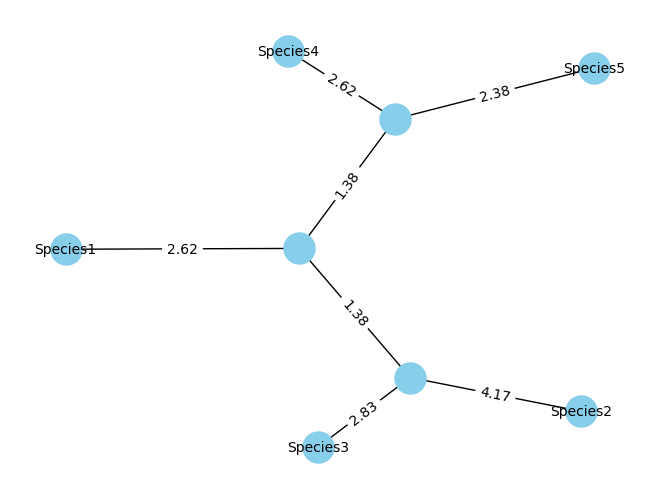

In [ ]:
G = neighbor_joining(distance_matrix.values)
# Plot the resulting tree
plot_tree(G, species)

<div style="border-bottom: 2px solid;"></div>

<div style="border-bottom: 2px solid;"></div>